Diseñar un Sistema Inteligente de Control de Tránsito para un cruce peatonal en una autopista.

Puede considerar como variables de entrada el flujo del tránsito sobre la autopista (cantidad de autos por minuto) y la
densidad de peatones que esperan en el cruce (peatones por metro cuadrado), o agregar las que considere importantes.
Las salidas son los tiempos en que los semáforos se mantienen en luz verde o en luz roja.

Establecer conjuntos difusos para
las variables, determinar las reglas que controlarán el sistema. Observar y comentar los resultados obtenidos.



---



Variables de entrada
- Flujo del transito sobre la autopista (cantidad de autos por minuto)
  - Alta : 40 - 90 (por min)
  - Media : 15 - 50 (por min)
  - Baja : 0 - 20 (por min)

- Densidad de peatones que esperan en el cruce (peatones por metro cuadrado)
  - Alta : 3 - 6
  - Media : 2 - 4
  - Baja : 0 - 3

Variables de salida
- Tiempos en que los semaforos se mantienen en luz verde o en luz roja
  - Corto : 10 - 25 seg
  - Medio : 20 - 60 seg
  - Largo : 45 - 70 seg

---

Reglas de inferencias difusas

- Regla 1: Si el Flujo de Tránsito es Bajo y la Densidad de Peatones es Alta, entonces el Tiempo en Luz Roja será Largo y el Tiempo en Luz Verde será Corto.

- Regla 2: Si el Flujo de Tránsito es Bajo y la Densidad de Peatones es Baja, entonces el Tiempo en Luz Roja será Corto y el Tiempo en Luz Verde será Largo.

- Regla 3: Si el Flujo de Tránsito es Medio y la Densidad de Peatones es Alta, entonces el Tiempo en Luz Roja será Medio y el Tiempo en Luz Verde será Medio.

- Regla 4: Si el Flujo de Tránsito es Medio y la Densidad de Peatones es Baja, entonces el Tiempo en Luz Roja será Corto y el Tiempo en Luz Verde será Medio.

- Regla 5: Si el Flujo de Tránsito es Alto y la Densidad de Peatones es Alta, entonces el Tiempo en Luz Roja será Medio y el Tiempo en Luz Verde será Largo.

- Regla 6: Si el Flujo de Tránsito es Alto y la Densidad de Peatones es Baja, entonces el Tiempo en Luz Roja será Corto y el Tiempo en Luz Verde será Largo.

- Regla 7: Si el Flujo de Tránsito es Bajo y la Densidad de Peatones es Alta, entonces el Tiempo en Luz Roja será Largo y el Tiempo en Luz Verde será Muy Corto.

- Regla 8: Si el Flujo de Tránsito es Alto y la Densidad de Peatones es Baja, entonces el Tiempo en Luz Roja será Corto y el Tiempo en Luz Verde será Muy Largo.

- Regla 9: Si el Flujo de Tránsito es Bajo y la Densidad de Peatones es Baja, entonces el Tiempo en Luz Roja será Muy Corto y el Tiempo en Luz Verde será Largo.

- Regla 10: Si el Flujo de Tránsito es Medio y la Densidad de Peatones es Media, entonces el Tiempo en Luz Roja será Medio y el Tiempo en Luz Verde será Medio.

- Regla 11: Si el Flujo de Tránsito es Alto y la Densidad de Peatones es Alta, entonces el Tiempo en Luz Roja será Medio y el Tiempo en Luz Verde será Muy Largo.

- Regla 12: Si el Flujo de Tránsito es Bajo y la Densidad de Peatones es Media, entonces el Tiempo en Luz Roja será Medio y el Tiempo en Luz Verde será Medio.

---
Observaciones
Los escenarios con flujo de tránsito bajo y alta densidad de peatones resultarán en un mayor tiempo de cruce para los peatones (luz roja más larga para vehículos).
Los escenarios con flujo de tránsito alto y baja densidad de peatones permitirán que los vehículos mantengan más tiempo la luz verde, priorizando el flujo de tránsito.


Tiempo de luz verde ajustado (centroide): 29.08 segundos


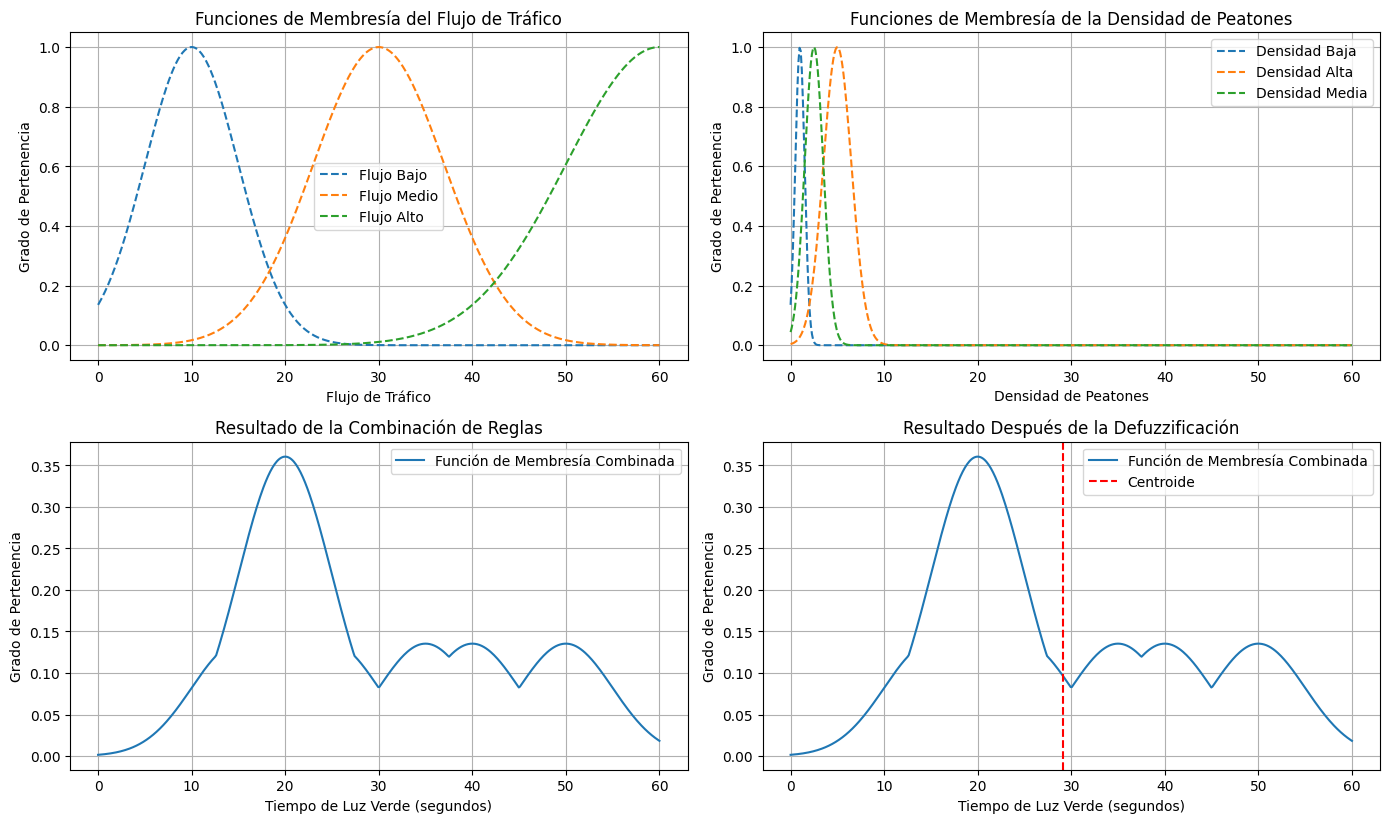

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Definir la función de membresía gaussiana
def gaussmf(x, mean, sigma):
    return np.exp(-((x - mean)**2.) / (2 * sigma**2.))

# Definir la función de combinación de reglas
def combine_rules(flujo_trafico, densidad_peatones, rules):
    x_out = np.linspace(0, 60, 500)  # Supongamos que el rango es de 0 a 60 segundos
    y_out = np.zeros_like(x_out)

    for rule in rules:
        y_rule = rule(flujo_trafico, densidad_peatones, x_out)
        y_out = np.maximum(y_out, y_rule)

    return x_out, y_out

# Calcular el centroide
def calculate_centroid(x, y):
    return np.sum(x * y) / np.sum(y)

# Definir las reglas difusas con funciones de salida gaussiana
def rule1(flujo_trafico, densidad_peatones, x_out):
    flujo_bajo = gaussmf(flujo_trafico, mean=10, sigma=5)
    densidad_alta = gaussmf(densidad_peatones, mean=5, sigma=1.5)
    luz_verde_peaton = np.minimum(flujo_bajo, densidad_alta)
    return luz_verde_peaton * gaussmf(x_out, mean=30, sigma=5)

def rule2(flujo_trafico, densidad_peatones, x_out):
    flujo_alto = gaussmf(flujo_trafico, mean=60, sigma=10)
    densidad_baja = gaussmf(densidad_peatones, mean=1, sigma=0.5)
    luz_verde_trafico = np.minimum(flujo_alto, densidad_baja)
    return luz_verde_trafico * gaussmf(x_out, mean=40, sigma=5)

def rule3(flujo_trafico, densidad_peatones, x_out):
    flujo_medio = gaussmf(flujo_trafico, mean=30, sigma=7)
    densidad_alta = gaussmf(densidad_peatones, mean=5, sigma=1.5)
    luz_verde_equilibrado = np.minimum(flujo_medio, densidad_alta)
    return luz_verde_equilibrado * gaussmf(x_out, mean=20, sigma=5)

def rule4(flujo_trafico, densidad_peatones, x_out):
    flujo_bajo = gaussmf(flujo_trafico, mean=10, sigma=5)
    densidad_baja = gaussmf(densidad_peatones, mean=1, sigma=0.5)
    luz_verde_balanceado = np.minimum(flujo_bajo, densidad_baja)
    return luz_verde_balanceado * gaussmf(x_out, mean=10, sigma=5)

def rule5(flujo_trafico, densidad_peatones, x_out):
    flujo_alto = gaussmf(flujo_trafico, mean=60, sigma=10)
    densidad_media = gaussmf(densidad_peatones, mean=2.5, sigma=1)
    luz_verde_trafico = np.minimum(flujo_alto, densidad_media)
    return luz_verde_trafico * gaussmf(x_out, mean=25, sigma=5)

def rule6(flujo_trafico, densidad_peatones, x_out):
    flujo_medio = gaussmf(flujo_trafico, mean=30, sigma=7)
    densidad_baja = gaussmf(densidad_peatones, mean=1, sigma=0.5)
    luz_verde_balanceado = np.minimum(flujo_medio, densidad_baja)
    return luz_verde_balanceado * gaussmf(x_out, mean=15, sigma=5)

def rule7(flujo_trafico, densidad_peatones, x_out):
    flujo_bajo = gaussmf(flujo_trafico, mean=10, sigma=5)
    densidad_alta = gaussmf(densidad_peatones, mean=5, sigma=1.5)
    luz_verde_minima = np.minimum(flujo_bajo, densidad_alta)
    return luz_verde_minima * gaussmf(x_out, mean=5, sigma=5)

def rule8(flujo_trafico, densidad_peatones, x_out):
    flujo_alto = gaussmf(flujo_trafico, mean=60, sigma=10)
    densidad_baja = gaussmf(densidad_peatones, mean=1, sigma=0.5)
    luz_verde_maxima = np.minimum(flujo_alto, densidad_baja)
    return luz_verde_maxima * gaussmf(x_out, mean=50, sigma=5)

def rule9(flujo_trafico, densidad_peatones, x_out):
    flujo_bajo = gaussmf(flujo_trafico, mean=10, sigma=5)
    densidad_baja = gaussmf(densidad_peatones, mean=1, sigma=0.5)
    luz_verde_poco = np.minimum(flujo_bajo, densidad_baja)
    return luz_verde_poco * gaussmf(x_out, mean=10, sigma=5)

def rule10(flujo_trafico, densidad_peatones, x_out):
    flujo_medio = gaussmf(flujo_trafico, mean=30, sigma=7)
    densidad_media = gaussmf(densidad_peatones, mean=2.5, sigma=1)
    luz_verde_equilibrado = np.minimum(flujo_medio, densidad_media)
    return luz_verde_equilibrado * gaussmf(x_out, mean=20, sigma=5)

def rule11(flujo_trafico, densidad_peatones, x_out):
    flujo_alto = gaussmf(flujo_trafico, mean=60, sigma=10)
    densidad_alta = gaussmf(densidad_peatones, mean=5, sigma=1.5)
    luz_verde_largo = np.minimum(flujo_alto, densidad_alta)
    return luz_verde_largo * gaussmf(x_out, mean=35, sigma=5)

def rule12(flujo_trafico, densidad_peatones, x_out):
    flujo_bajo = gaussmf(flujo_trafico, mean=10, sigma=5)
    densidad_media = gaussmf(densidad_peatones, mean=2.5, sigma=1)
    luz_verde_media = np.minimum(flujo_bajo, densidad_media)
    return luz_verde_media * gaussmf(x_out, mean=15, sigma=5)

# Crear el sistema difuso
rules = [rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10, rule11, rule12]

# Evaluar el sistema con algunas entradas
flujo_trafico = 40
densidad_peatones = 2

x_out, y_combined = combine_rules(flujo_trafico, densidad_peatones, rules)
centroid = calculate_centroid(x_out, y_combined)

print(f"Tiempo de luz verde ajustado (centroide): {centroid:.2f} segundos")

# Visualización de los gráficos típicos en un sistema FIS de Mamdani
x = np.linspace(0, 60, 500)
plt.figure(figsize=(14, 12))

# Graficar funciones de membresía para las entradas
plt.subplot(3, 2, 1)
plt.plot(x, gaussmf(x, mean=10, sigma=5), label='Flujo Bajo', linestyle='--')
plt.plot(x, gaussmf(x, mean=30, sigma=7), label='Flujo Medio', linestyle='--')
plt.plot(x, gaussmf(x, mean=60, sigma=10), label='Flujo Alto', linestyle='--')
plt.title('Funciones de Membresía del Flujo de Tráfico')
plt.xlabel('Flujo de Tráfico')
plt.ylabel('Grado de Pertenencia')
plt.legend()
plt.grid(True)

plt.subplot(3, 2, 2)
plt.plot(x, gaussmf(x, mean=1, sigma=0.5), label='Densidad Baja', linestyle='--')
plt.plot(x, gaussmf(x, mean=5, sigma=1.5), label='Densidad Alta', linestyle='--')
plt.plot(x, gaussmf(x, mean=2.5, sigma=1), label='Densidad Media', linestyle='--')
plt.title('Funciones de Membresía de la Densidad de Peatones')
plt.xlabel('Densidad de Peatones')
plt.ylabel('Grado de Pertenencia')
plt.legend()
plt.grid(True)

# Graficar el resultado combinado antes de la defuzzificación
plt.subplot(3, 2, 3)
plt.plot(x_out, y_combined, label='Función de Membresía Combinada')
plt.title('Resultado de la Combinación de Reglas')
plt.xlabel('Tiempo de Luz Verde (segundos)')
plt.ylabel('Grado de Pertenencia')
plt.legend()
plt.grid(True)

# Graficar el resultado después de la defuzzificación
plt.subplot(3, 2, 4)
plt.plot(x_out, y_combined, label='Función de Membresía Combinada')
plt.axvline(x=centroid, color='r', linestyle='--', label='Centroide')
plt.title('Resultado Después de la Defuzzificación')
plt.xlabel('Tiempo de Luz Verde (segundos)')
plt.ylabel('Grado de Pertenencia')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


1. Funciones de Membresía de Entradas
Flujo de Tráfico:

- Flujo Bajo: Grado de pertenencia máximo en valores bajos de flujo de tráfico.
- Flujo Medio: Grado de pertenencia máximo en valores medios de flujo de tráfico.
- Flujo Alto: Grado de pertenencia máximo en valores altos de flujo de tráfico.


Densidad de Peatones:

- Densidad Baja: Grado de pertenencia máximo en valores bajos de densidad de peatones.
- Densidad Alta: Grado de pertenencia máximo en valores altos de densidad de peatones.
- Densidad Media: Grado de pertenencia máximo en valores medios de densidad de peatones.


Resultado de la Combinación de Reglas

Función de Membresía Combinada:
- La función combinada representa la integración de todas las reglas difusas aplicadas al sistema. Muestra el grado de pertenencia de cada posible tiempo de luz verde basado en las reglas definidas.
Las áreas con mayor grado de pertenencia indican los tiempos de luz verde más recomendados según las reglas combinadas.


Resultado Después de la Defuzzificación

Centroide:
El centroide (o valor de defuzzificación) es el valor de tiempo de luz verde ajustado que se obtiene al calcular el centro de masa de la función combinada.
La línea vertical roja en el gráfico muestra este valor específico, que es el resultado final de la defuzzificación y representa el tiempo de luz verde óptimo dado el flujo de tráfico y la densidad de peatones actuales.